In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('churn prediction_rf.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df=df.drop('customerID', axis=1)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
print(df['TotalCharges'].to_list())

['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8', '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25', '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3', '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95', '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3', '3549.25', '1105.4', '475.7', '4872.35', '418.25', '4861.45', '981.45', '3906.7', '97', '144.15', '4217.8', '4254.1', '3838.75', '1426.4', '1752.65', '633.3', '4456.35', '1752.55', '6311.2', '7076.35', '894.3', '7853.7', '4707.1', '5450.7', '2962', '957.1', '857.25', '244.1', '3650.35', '2497.2', '930.9', '887.35', '49.05', '1090.65', '7099', '1424.6', '177.4', '6139.5', '2688.85', '482.25', '2111.3', '1216.6', '79.35', '565.35', '496.9', '4327.5', '973.35', '918.75', '2215.45', '1057', '927.1', '1009.25', '2570.2', '74.7', '5714.25', '7107', '7459.05', '927.35', '4748.7', '113.85', '1107.2', '2514.5', '20.2', '1

In [18]:
df['TotalCharges'].nunique()

6531

In [24]:
df['TotalCharges']=df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])
df.isna().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19904\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [26]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [34]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [35]:
label_encode_col_name=['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in label_encode_col_name:
    df[col]=df[col].astype('category')
    df[col]=df[col].cat.codes

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [40]:
df=pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], drop_first=True, dtype=int)

In [41]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,2,0,2,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,2,2,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,2,0,2,2,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,2,...,0,0,1,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,0,2,2,0,...,0,0,1,1,0,1,0,1,0,0
7040,0,0,1,1,11,0,2,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1


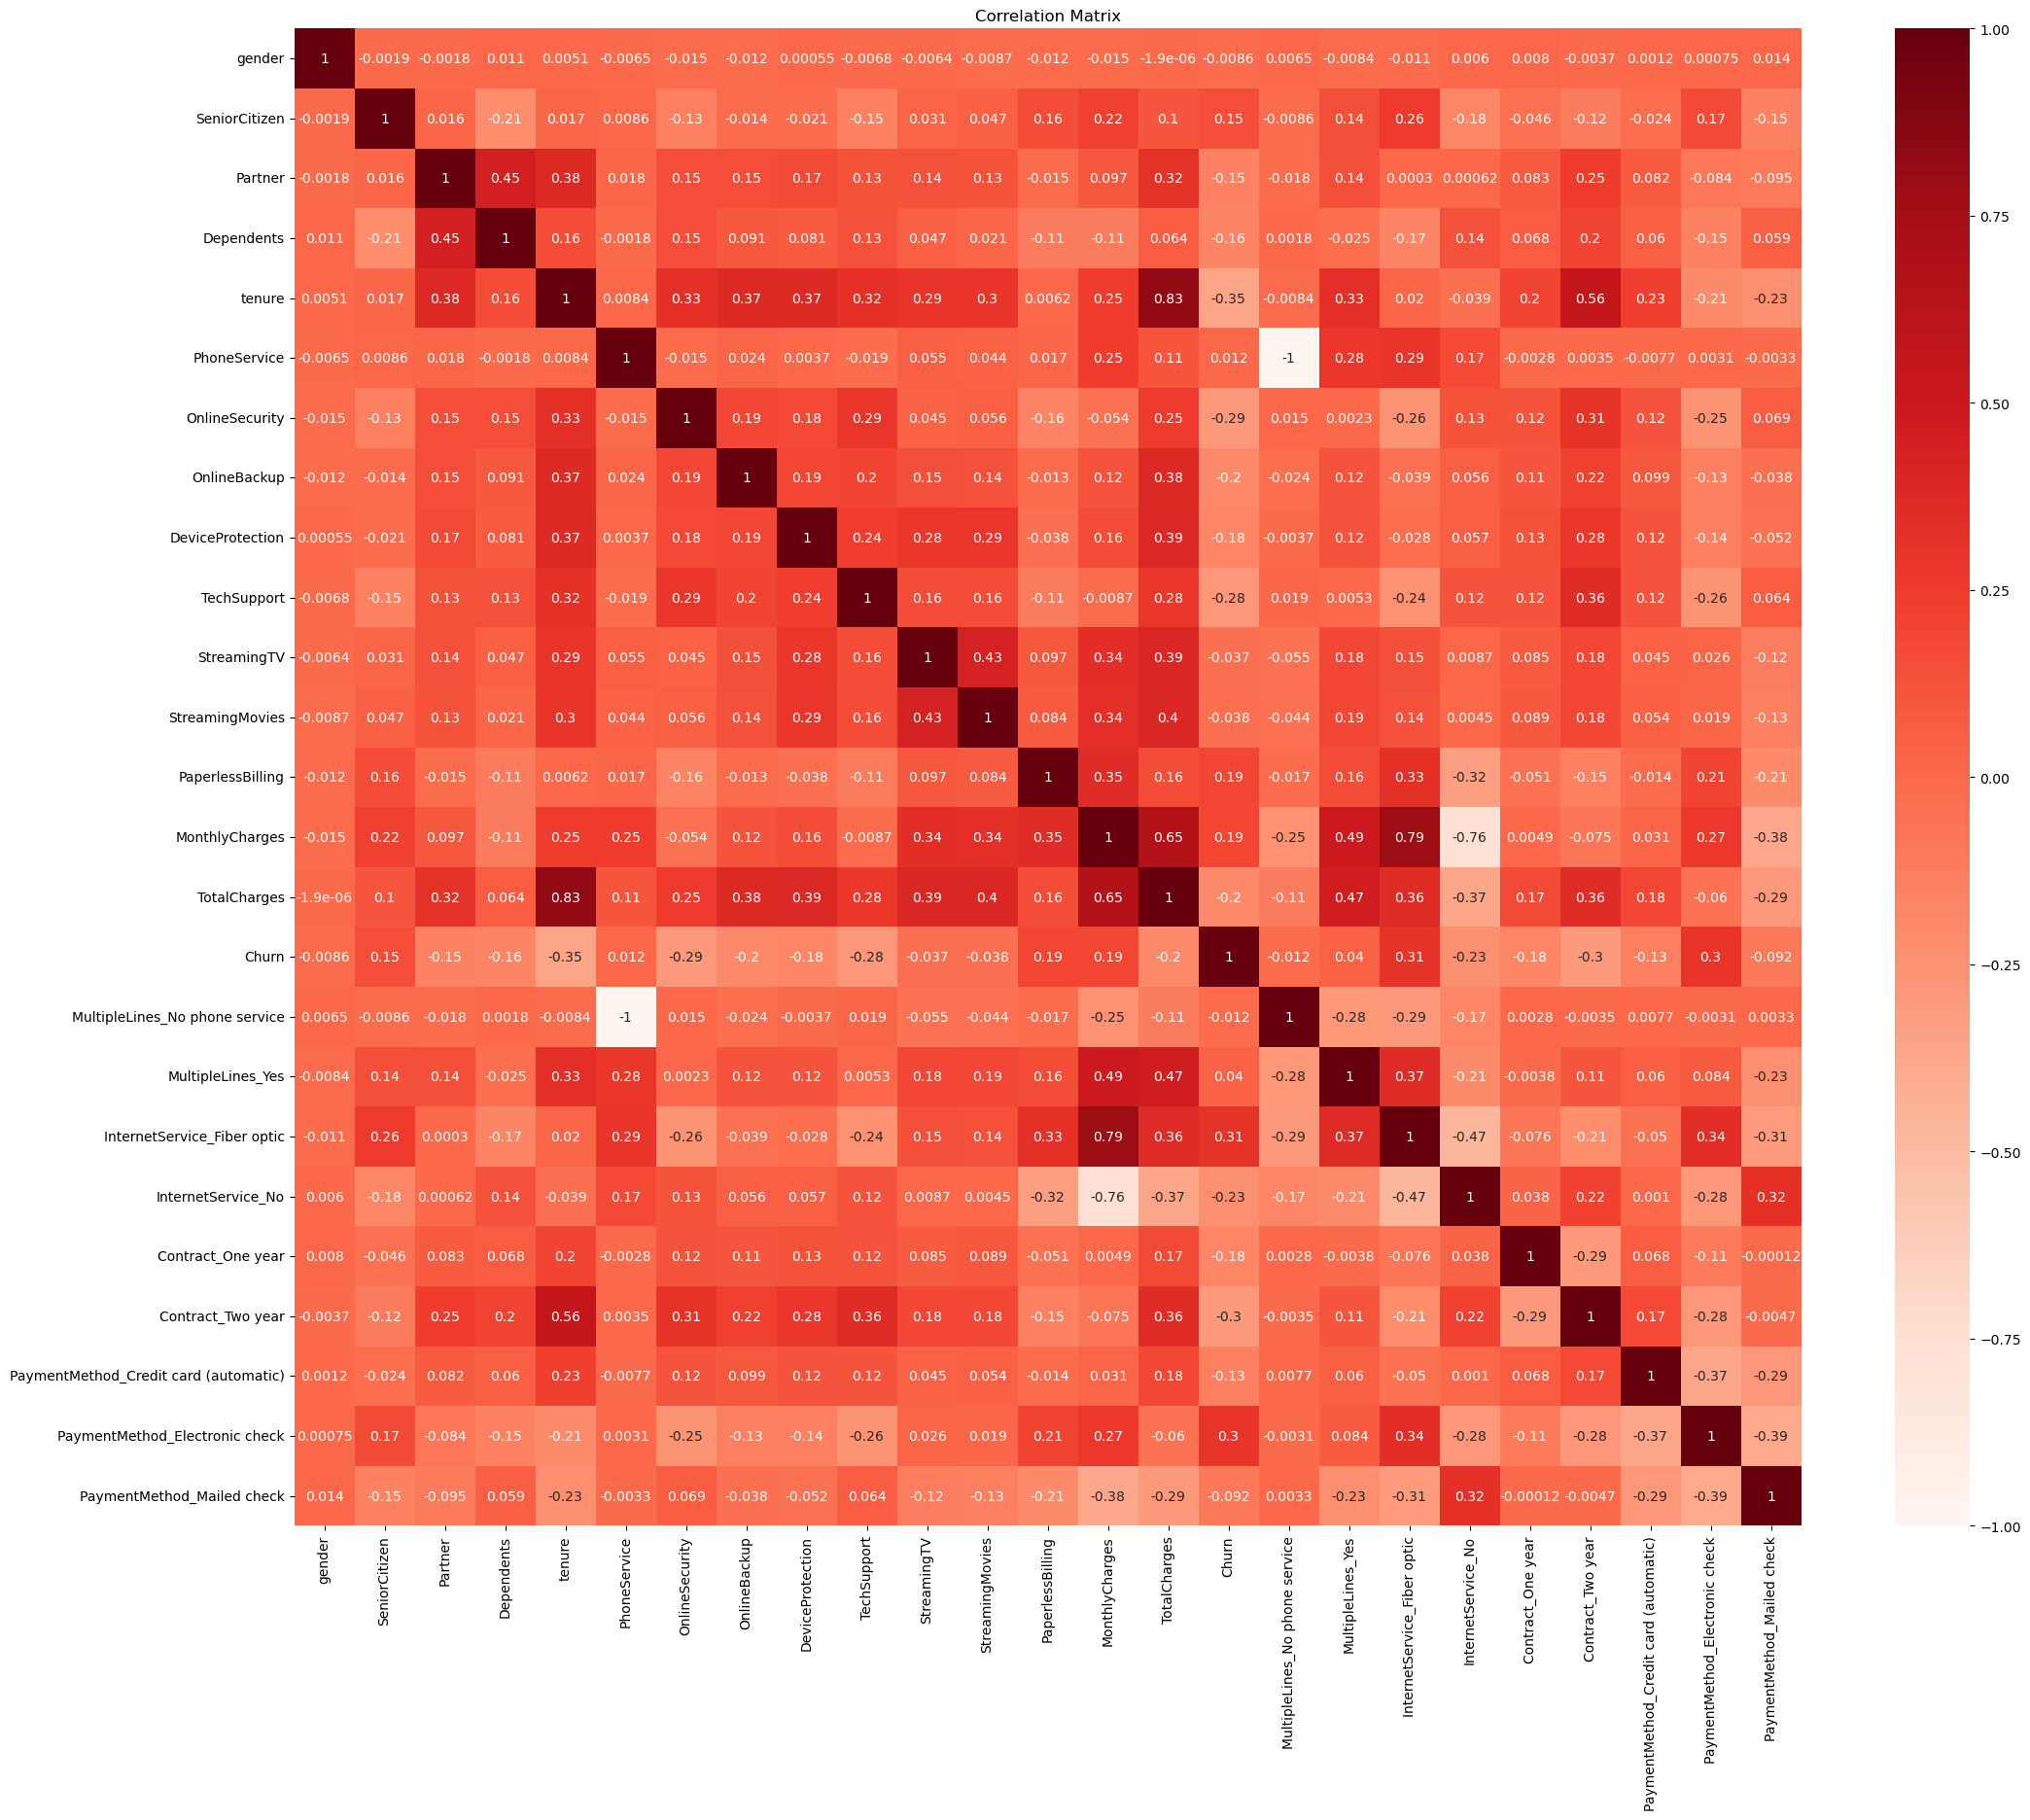

In [45]:
plt.figure(figsize=(25,20), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [49]:
x=df.drop('Churn', axis=1)
y=df['Churn']
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import RandomOverSampler
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [52]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=10, stratify=y)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [77]:
rf=RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [78]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [79]:
print('Training Accuracy: ', accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.998067259373792


In [80]:
print('Testing Accuracy: ', accuracy_score(y_test,y_pred_test))

Testing Accuracy:  0.8859683030537302


In [81]:
print('Confusion Matrix Training: ', confusion_matrix(y_train, y_pred_train))

Confusion Matrix Training:  [[3871   10]
 [   5 3875]]


In [82]:
print('Confusion Matirx Testing: ', confusion_matrix(y_test, y_pred_test))

Confusion Matirx Testing:  [[1062  231]
 [  64 1230]]


In [83]:
print('Classification Report: ', classification_report(y_train, y_pred_train))

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3881
           1       1.00      1.00      1.00      3880

    accuracy                           1.00      7761
   macro avg       1.00      1.00      1.00      7761
weighted avg       1.00      1.00      1.00      7761



In [84]:
print('Classification Report: ', classification_report(y_test, y_pred_test))

Classification Report:                precision    recall  f1-score   support

           0       0.94      0.82      0.88      1293
           1       0.84      0.95      0.89      1294

    accuracy                           0.89      2587
   macro avg       0.89      0.89      0.89      2587
weighted avg       0.89      0.89      0.89      2587



In [85]:
train_accu=cross_val_score(rf, x_train, y_train, cv=10)
print('Average Training Accuracy: ', train_accu.mean())

Average Training Accuracy:  0.8745011211506057


In [86]:
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred_test))

ROC AUC SCORE:  0.8859433329627731


In [87]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test)

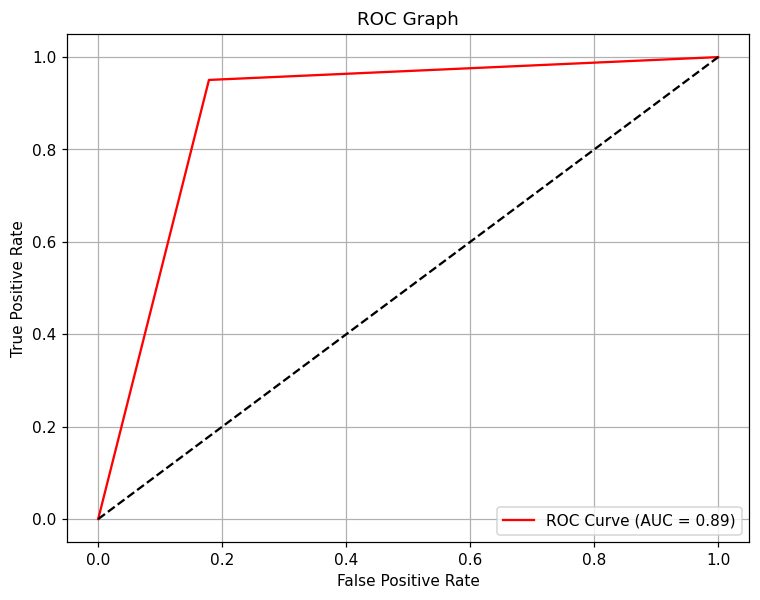

In [88]:
plt.figure(figsize=(8,6), dpi=110)
plt.plot(fpr, tpr, color='red',label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_test)))
plt.plot([0,1],[0,1],'k--')
plt.title('ROC Graph')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()